In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime
from datetime import datetime

In [2]:
pip install --isolated pmdarima

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('Cleaned_Dataset.csv.zip',low_memory=False, compression= 'gzip')
df

,Date,Month,Pickup_Time,lpep_pickup_datetime,lpep_dropoff_datetime,Drop_Time,PULocationID,Pickup_Zone,Pickup_Borough,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_distance_kms,trip_duration
0,2019-01-01 00:00:00,January,13:57:35,2019-01-01 13:57:35,2019-01-01 14:02:39,14:02:39,65,Downtown Brooklyn/MetroTech,Brooklyn,97,...,5.5,0.0,0.5,0.00,0.00,0.3,6.30,0.00,1.528873,5.066667
1,2019-01-01 00:00:00,January,13:19:18,2019-01-01 13:19:18,2019-01-01 14:04:33,14:04:33,168,Mott Haven/Port Morris,Bronx,55,...,70.0,0.0,0.5,0.00,5.76,0.3,76.56,0.00,41.424412,45.250000
2,2019-01-01 00:00:00,January,13:28:46,2019-01-01 13:28:46,2019-01-01 13:40:00,13:40:00,74,East Harlem North,Manhattan,24,...,9.0,0.0,0.5,1.96,0.00,0.3,11.76,0.00,2.751971,11.233333
3,2019-01-01 00:00:00,January,13:04:43,2019-01-01 13:04:43,2019-01-01 13:11:08,13:11:08,74,East Harlem North,Manhattan,41,...,6.0,0.0,0.5,1.02,0.00,0.3,7.82,0.00,1.770274,6.416667
4,2019-01-01 00:00:00,January,13:10:21,2019-01-01 13:10:21,2019-01-01 13:23:48,13:23:48,166,Morningside Heights,Manhattan,141,...,13.5,0.0,0.5,2.86,0.00,0.3,17.16,0.00,5.954558,13.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8556262,2021-12-31 00:00:00,December,16:59:45,2021-12-31 16:59:45,2021-12-31 17:08:42,17:08:42,97,Fort Greene,Brooklyn,17,...,7.5,1.0,0.5,0.00,0.00,0.3,9.30,0.00,2.124329,8.950000
8556263,2021-12-31 00:00:00,December,16:24:21,2021-12-31 16:24:21,2021-12-31 16:29:48,16:29:48,75,East Harlem South,Manhattan,74,...,5.5,1.0,0.5,0.00,0.00,0.3,7.30,0.00,1.464499,5.450000
8556264,2021-12-31 00:00:00,December,16:31:21,2021-12-31 16:31:21,2021-12-31 16:52:16,16:52:16,190,Prospect Park,Brooklyn,66,...,15.0,1.0,0.5,2.52,0.00,0.3,19.32,0.00,5.745344,20.916667
8556265,2021-12-31 00:00:00,December,16:14:04,2021-12-31 16:14:04,2021-12-31 16:20:01,16:20:01,75,East Harlem South,Manhattan,236,...,6.5,1.0,0.5,1.77,0.00,0.3,12.82,2.75,2.140422,5.950000


In [4]:
df['lpep_pickup_datetime'] = pd.to_datetime(df.lpep_pickup_datetime)
df['lpep_dropoff_datetime'] = pd.to_datetime(df.lpep_dropoff_datetime)
df['Date'] = pd.to_datetime(df.Date)

In [5]:
df.columns

Index(['Date', 'Month', 'Pickup_Time', 'lpep_pickup_datetime',
       'lpep_dropoff_datetime', 'Drop_Time', 'PULocationID', 'Pickup_Zone',
       'Pickup_Borough', 'DOLocationID', 'Dropoff_Zone', 'Dropoff_Borough',
       'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'trip_distance_kms', 'trip_duration'],
      dtype='object')

In [6]:
df.dtypes

Date                     datetime64[ns]
Month                            object
Pickup_Time                      object
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
Drop_Time                        object
PULocationID                      int64
Pickup_Zone                      object
Pickup_Borough                   object
DOLocationID                      int64
Dropoff_Zone                     object
Dropoff_Borough                  object
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
trip_distance_kms               float64
trip_duration                   float64
dtype: object

In [7]:
df1= df[(df['lpep_pickup_datetime'].dt.year==2021)]
df1

,Date,Month,Pickup_Time,lpep_pickup_datetime,lpep_dropoff_datetime,Drop_Time,PULocationID,Pickup_Zone,Pickup_Borough,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_distance_kms,trip_duration
7538924,2021-01-01,January,15:28:08,2021-01-01 15:28:08,2021-01-01 15:38:42,15:38:42,41,Central Harlem,Manhattan,166,...,9.0,0.0,0.5,1.47,0.0,0.3,11.27,0.00,2.558851,10.566667
7538925,2021-01-01,January,15:27:39,2021-01-01 15:27:39,2021-01-01 15:40:45,15:40:45,74,East Harlem North,Manhattan,238,...,12.0,0.0,0.5,3.11,0.0,0.3,18.66,2.75,5.085514,13.100000
7538926,2021-01-01,January,15:23:04,2021-01-01 15:23:04,2021-01-01 15:32:21,15:32:21,24,Bloomingdale,Manhattan,75,...,8.0,0.0,0.5,0.00,0.0,0.3,8.80,0.00,2.510570,9.283333
7538927,2021-01-01,January,15:20:20,2021-01-01 15:20:20,2021-01-01 15:25:10,15:25:10,134,Kew Gardens,Queens,28,...,5.5,0.0,0.5,1.58,0.0,0.3,7.88,0.00,1.786367,4.833333
7538928,2021-01-01,January,15:25:22,2021-01-01 15:25:22,2021-01-01 15:46:18,15:46:18,42,Central Harlem North,Manhattan,246,...,23.0,0.0,0.5,0.00,0.0,0.3,26.55,2.75,10.975699,20.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8556262,2021-12-31,December,16:59:45,2021-12-31 16:59:45,2021-12-31 17:08:42,17:08:42,97,Fort Greene,Brooklyn,17,...,7.5,1.0,0.5,0.00,0.0,0.3,9.30,0.00,2.124329,8.950000
8556263,2021-12-31,December,16:24:21,2021-12-31 16:24:21,2021-12-31 16:29:48,16:29:48,75,East Harlem South,Manhattan,74,...,5.5,1.0,0.5,0.00,0.0,0.3,7.30,0.00,1.464499,5.450000
8556264,2021-12-31,December,16:31:21,2021-12-31 16:31:21,2021-12-31 16:52:16,16:52:16,190,Prospect Park,Brooklyn,66,...,15.0,1.0,0.5,2.52,0.0,0.3,19.32,0.00,5.745344,20.916667
8556265,2021-12-31,December,16:14:04,2021-12-31 16:14:04,2021-12-31 16:20:01,16:20:01,75,East Harlem South,Manhattan,236,...,6.5,1.0,0.5,1.77,0.0,0.3,12.82,2.75,2.140422,5.950000


In [8]:
df1.columns

Index(['Date', 'Month', 'Pickup_Time', 'lpep_pickup_datetime',
       'lpep_dropoff_datetime', 'Drop_Time', 'PULocationID', 'Pickup_Zone',
       'Pickup_Borough', 'DOLocationID', 'Dropoff_Zone', 'Dropoff_Borough',
       'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'trip_distance_kms', 'trip_duration'],
      dtype='object')

In [9]:
df1['Date'] = pd.to_datetime(df1['lpep_pickup_datetime'],errors='coerce').dt.date
df1['Pickup_Time'] = pd.to_datetime(df1['lpep_pickup_datetime']).dt.time

<ipython-input-9-f0634eca5441>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.to_datetime(df1['lpep_pickup_datetime'],errors='coerce').dt.date
<ipython-input-9-f0634eca5441>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Pickup_Time'] = pd.to_datetime(df1['lpep_pickup_datetime']).dt.time


In [10]:
df1.duplicated().sum()

0

In [11]:
df1['row_num'] = df1.reset_index().index
df1

<ipython-input-11-b2609d2f314d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['row_num'] = df1.reset_index().index


,Date,Month,Pickup_Time,lpep_pickup_datetime,lpep_dropoff_datetime,Drop_Time,PULocationID,Pickup_Zone,Pickup_Borough,DOLocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_distance_kms,trip_duration,row_num
7538924,2021-01-01,January,15:28:08,2021-01-01 15:28:08,2021-01-01 15:38:42,15:38:42,41,Central Harlem,Manhattan,166,...,0.0,0.5,1.47,0.0,0.3,11.27,0.00,2.558851,10.566667,0
7538925,2021-01-01,January,15:27:39,2021-01-01 15:27:39,2021-01-01 15:40:45,15:40:45,74,East Harlem North,Manhattan,238,...,0.0,0.5,3.11,0.0,0.3,18.66,2.75,5.085514,13.100000,1
7538926,2021-01-01,January,15:23:04,2021-01-01 15:23:04,2021-01-01 15:32:21,15:32:21,24,Bloomingdale,Manhattan,75,...,0.0,0.5,0.00,0.0,0.3,8.80,0.00,2.510570,9.283333,2
7538927,2021-01-01,January,15:20:20,2021-01-01 15:20:20,2021-01-01 15:25:10,15:25:10,134,Kew Gardens,Queens,28,...,0.0,0.5,1.58,0.0,0.3,7.88,0.00,1.786367,4.833333,3
7538928,2021-01-01,January,15:25:22,2021-01-01 15:25:22,2021-01-01 15:46:18,15:46:18,42,Central Harlem North,Manhattan,246,...,0.0,0.5,0.00,0.0,0.3,26.55,2.75,10.975699,20.933333,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8556262,2021-12-31,December,16:59:45,2021-12-31 16:59:45,2021-12-31 17:08:42,17:08:42,97,Fort Greene,Brooklyn,17,...,1.0,0.5,0.00,0.0,0.3,9.30,0.00,2.124329,8.950000,1017338
8556263,2021-12-31,December,16:24:21,2021-12-31 16:24:21,2021-12-31 16:29:48,16:29:48,75,East Harlem South,Manhattan,74,...,1.0,0.5,0.00,0.0,0.3,7.30,0.00,1.464499,5.450000,1017339
8556264,2021-12-31,December,16:31:21,2021-12-31 16:31:21,2021-12-31 16:52:16,16:52:16,190,Prospect Park,Brooklyn,66,...,1.0,0.5,2.52,0.0,0.3,19.32,0.00,5.745344,20.916667,1017340
8556265,2021-12-31,December,16:14:04,2021-12-31 16:14:04,2021-12-31 16:20:01,16:20:01,75,East Harlem South,Manhattan,236,...,1.0,0.5,1.77,0.0,0.3,12.82,2.75,2.140422,5.950000,1017341


In [12]:
df2 = df1.groupby(pd.Grouper(key='lpep_pickup_datetime', axis=0, freq='H')).count()['row_num']
df2

lpep_pickup_datetime
2021-01-01 00:00:00     53
2021-01-01 01:00:00     46
2021-01-01 02:00:00     22
2021-01-01 03:00:00     21
2021-01-01 04:00:00     11
                      ... 
2021-12-31 19:00:00    124
2021-12-31 20:00:00    131
2021-12-31 21:00:00     95
2021-12-31 22:00:00     84
2021-12-31 23:00:00     53
Freq: H, Name: row_num, Length: 8760, dtype: int64

In [13]:
df2=pd.DataFrame(df2)
df2

,row_num
lpep_pickup_datetime,
2021-01-01 00:00:00,53
2021-01-01 01:00:00,46
2021-01-01 02:00:00,22
2021-01-01 03:00:00,21
2021-01-01 04:00:00,11
...,...
2021-12-31 19:00:00,124
2021-12-31 20:00:00,131
2021-12-31 21:00:00,95


In [14]:
df2.rename(columns = {'row_num':'count'},inplace = True)
df2.index.names = ['Pickup_Time']
df2

,count
Pickup_Time,
2021-01-01 00:00:00,53
2021-01-01 01:00:00,46
2021-01-01 02:00:00,22
2021-01-01 03:00:00,21
2021-01-01 04:00:00,11
...,...
2021-12-31 19:00:00,124
2021-12-31 20:00:00,131
2021-12-31 21:00:00,95


In [15]:
train=df2.loc[(df2.index>'2021-12-08 23:00:00') & (df2.index<'2021-12-16 00:00:00')]
train

,count
Pickup_Time,
2021-12-09 00:00:00,43
2021-12-09 01:00:00,24
2021-12-09 02:00:00,16
2021-12-09 03:00:00,9
2021-12-09 04:00:00,17
...,...
2021-12-15 19:00:00,188
2021-12-15 20:00:00,148
2021-12-15 21:00:00,112


In [16]:
test=df2.loc[(df2.index>'2021-12-15 23:00:00') & (df2.index<'2021-12-17 00:00:00')]
test

,count
Pickup_Time,
2021-12-16 00:00:00,39
2021-12-16 01:00:00,32
2021-12-16 02:00:00,21
2021-12-16 03:00:00,25
2021-12-16 04:00:00,21
2021-12-16 05:00:00,34
2021-12-16 06:00:00,99
2021-12-16 07:00:00,177
2021-12-16 08:00:00,224


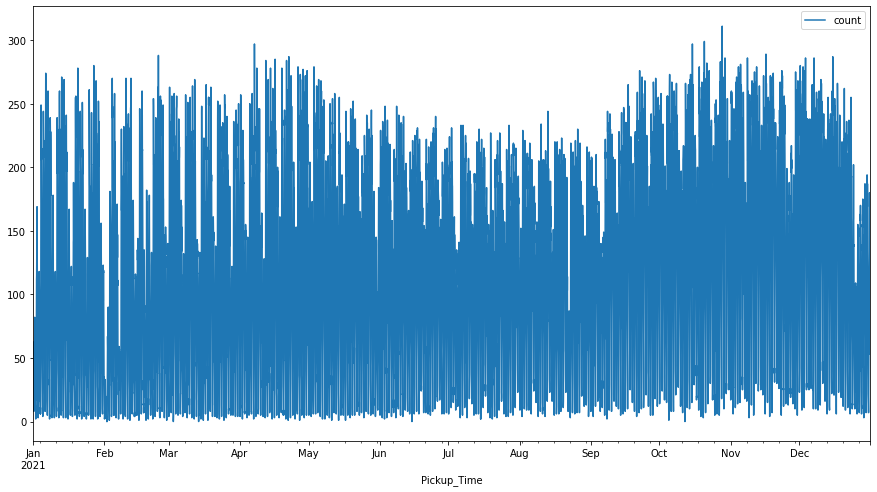

In [17]:
df2.plot(figsize=(15,8))

Text(0, 0.5, 'Trip Count')

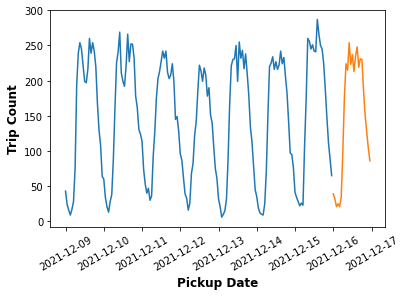

In [18]:
from matplotlib.pyplot import figure

figure(figsize=(6, 4))
plt.plot(train)
plt.plot(test)
plt.xticks(rotation = 30)
plt.xlabel('Pickup Date', fontweight='bold',fontsize='12', horizontalalignment='center')
plt.ylabel('Trip Count', fontweight='bold',fontsize='12', horizontalalignment='center')

In [19]:
#Checking the stationarity of data using adfuller
from statsmodels.tsa.stattools import adfuller
X = train['count'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.160639
p-value: 0.000000
Critical Values:
	1%: -3.473
	5%: -2.880
	10%: -2.577


In [20]:
#Using ndiffs test identifying the number of times we have to differentiate in order to make it stationary
from pmdarima.arima.utils import ndiffs
ndiffs(train['count'],test ='adf')

0

In [21]:
from pmdarima.arima.utils import nsdiffs
nsdiffs(train['count'],m=24)

0

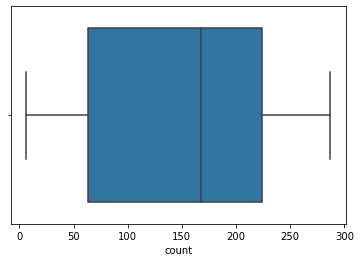

In [22]:
# Box Plot
import seaborn as sns
sns.boxplot(train['count'])

In [23]:
df2.isnull().sum()

count    0
dtype: int64

# Visualisation

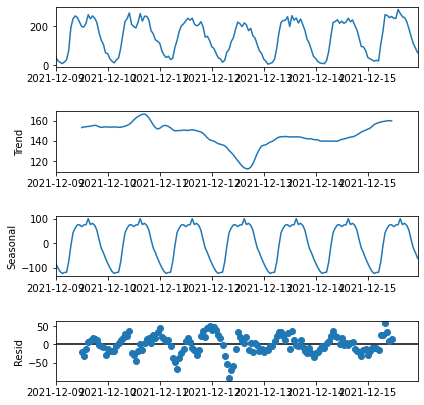

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(train, period=24)
fig=result.plot();
fig.set_size_inches((6, 6))

In [25]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [26]:
from statsmodels.tsa import stattools

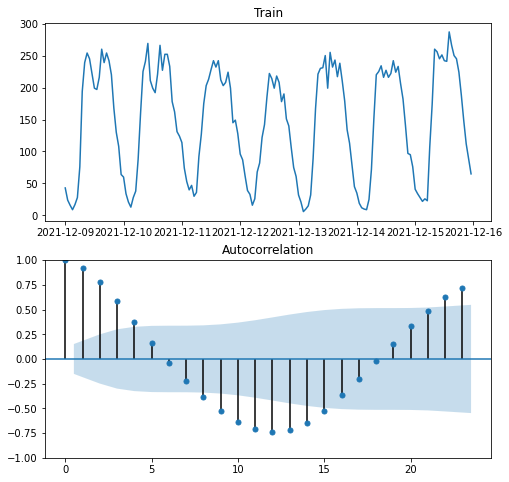

In [27]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,8))
ax1.plot(train)
ax1.set_title('Train')
plot_acf(train,ax=ax2);

C:\Users\User\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


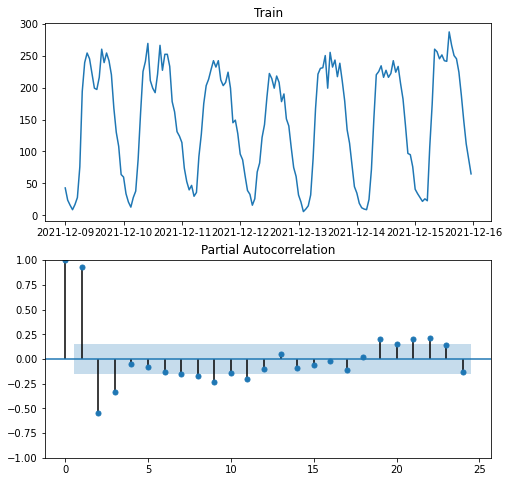

In [28]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,8))
ax1.plot(train)
ax1.set_title('Train')
plot_pacf(train,ax=ax2,lags=24);

In [29]:
import pmdarima as pm

In [30]:
model = pm.auto_arima(train,start_p=0,d=0,start_q=0,max_p=5,max_d=5,
                      max_q=5,start_P=0,start_D=0,start_Q=0,
                      max_P=5,max_D=5,max_Q=5,m=24,
                      stepwise=True,seasonal=True)
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  168
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 24)   Log Likelihood                -757.083
Date:                            Wed, 16 Nov 2022   AIC                           1528.167
Time:                                    10:10:33   BIC                           1550.034
Sample:                                12-09-2021   HQIC                          1537.042
                                     - 12-15-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4260      0.998      0.427      0.670      -1.531       2.383
ar.L1          0.8514      0.051   

In [52]:
predictions = pd.DataFrame(model.predict(n_periods = len(test)))
predictions.columns = ['forecasted']
predictions.index=test.index
predictions

,forecasted
Pickup_Time,
2021-12-16 00:00:00,45.486632
2021-12-16 01:00:00,35.581829
2021-12-16 02:00:00,27.960731
2021-12-16 03:00:00,23.824377
2021-12-16 04:00:00,28.584923
2021-12-16 05:00:00,31.343459
2021-12-16 06:00:00,82.718658
2021-12-16 07:00:00,146.496627
2021-12-16 08:00:00,204.040218


In [53]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [54]:
MAPE(test['count'], predictions['forecasted'])

9.28993732685516

Text(0, 0.5, 'Trip Count')

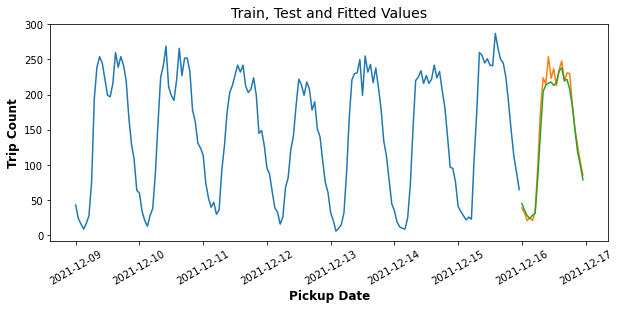

In [62]:
figure(figsize=(10, 4))
plt.title("Train, Test and Fitted Values",fontsize='14', horizontalalignment='center')
plt.plot(train)
plt.plot(test)
plt.plot(predictions['forecasted'])
plt.xticks(rotation=30)
plt.xlabel('Pickup Date', fontweight='bold',fontsize='12', horizontalalignment='center')
plt.ylabel('Trip Count', fontweight='bold',fontsize='12', horizontalalignment='center')

(array([738140.   , 738140.125, 738140.25 , 738140.375, 738140.5  ,
        738140.625, 738140.75 , 738140.875, 738141.   ]),
 <a list of 9 Text major ticklabel objects>)

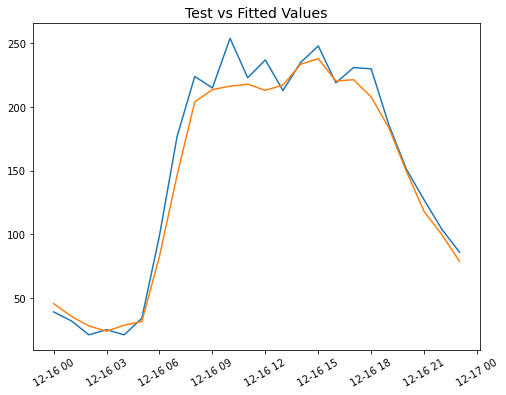

In [56]:
figure(figsize=(8, 6))
plt.title("Test vs Fitted Values",fontsize='14', horizontalalignment='center')
plt.plot(test)
plt.plot(predictions['forecasted'])
plt.xticks(rotation=30)

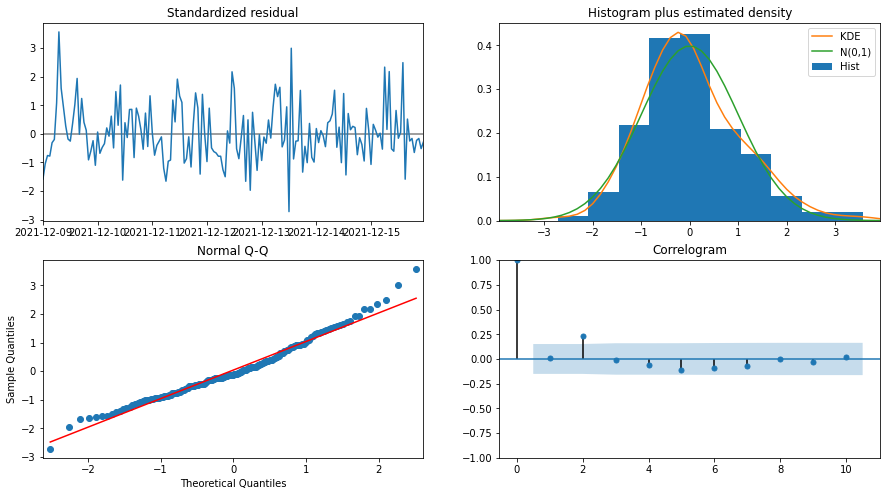

In [36]:
model.plot_diagnostics(figsize=(15,8))
plt.show()

### Holiday Model - LOG

In [37]:
train1=df2.loc[(df2.index>'2021-12-20 23:00:00') & (df2.index<'2021-12-28 00:00:00')]
train1

,count
Pickup_Time,
2021-12-21 00:00:00,33
2021-12-21 01:00:00,17
2021-12-21 02:00:00,9
2021-12-21 03:00:00,9
2021-12-21 04:00:00,19
...,...
2021-12-27 19:00:00,117
2021-12-27 20:00:00,68
2021-12-27 21:00:00,62


In [38]:
train1['log']=np.log(train1['count'])
train1

<ipython-input-38-863821dd40d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['log']=np.log(train1['count'])


,count,log
Pickup_Time,,
2021-12-21 00:00:00,33,3.496508
2021-12-21 01:00:00,17,2.833213
2021-12-21 02:00:00,9,2.197225
2021-12-21 03:00:00,9,2.197225
2021-12-21 04:00:00,19,2.944439
...,...,...
2021-12-27 19:00:00,117,4.762174
2021-12-27 20:00:00,68,4.219508
2021-12-27 21:00:00,62,4.127134


In [39]:
test1=df2.loc[(df2.index>'2021-12-27 23:00:00') & (df2.index<'2021-12-29 00:00:00')]
test1

,count
Pickup_Time,
2021-12-28 00:00:00,24
2021-12-28 01:00:00,15
2021-12-28 02:00:00,6
2021-12-28 03:00:00,6
2021-12-28 04:00:00,7
2021-12-28 05:00:00,14
2021-12-28 06:00:00,23
2021-12-28 07:00:00,68
2021-12-28 08:00:00,115


In [63]:
test1['log']=np.log(test1['count'])
test1

<ipython-input-63-7315c37f87b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['log']=np.log(test1['count'])


,count,log
Pickup_Time,,
2021-12-28 00:00:00,24,3.178054
2021-12-28 01:00:00,15,2.708050
2021-12-28 02:00:00,6,1.791759
2021-12-28 03:00:00,6,1.791759
2021-12-28 04:00:00,7,1.945910
2021-12-28 05:00:00,14,2.639057
2021-12-28 06:00:00,23,3.135494
2021-12-28 07:00:00,68,4.219508
2021-12-28 08:00:00,115,4.744932


Text(0, 0.5, 'Trip Count')

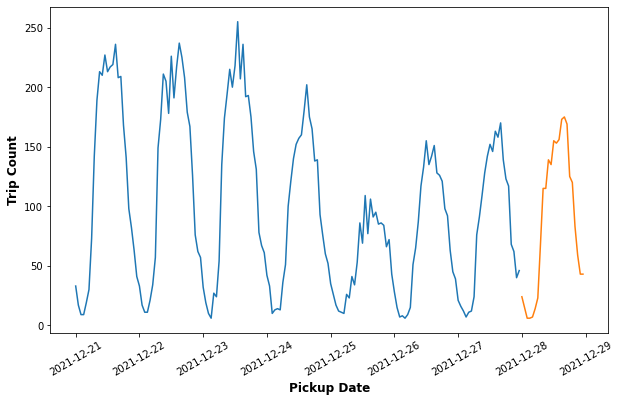

In [64]:
from matplotlib.pyplot import figure

figure(figsize=(10, 6))
plt.plot(train1['count'])
plt.plot(test1['count'])
plt.xticks(rotation = 30)
plt.xlabel('Pickup Date', fontweight='bold',fontsize='12', horizontalalignment='center')
plt.ylabel('Trip Count', fontweight='bold',fontsize='12', horizontalalignment='center')

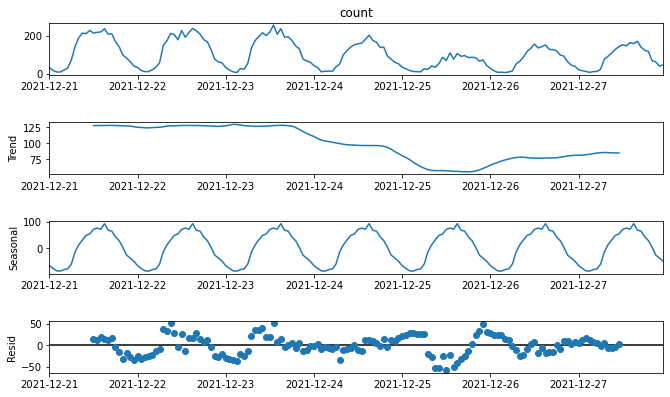

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(train1['count'], period=24)
fig=result.plot();
fig.set_size_inches((10, 6))

In [66]:
#Checking the stationarity of data using adfuller
from statsmodels.tsa.stattools import adfuller
X = train1['count'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.704409
p-value: 0.428842
Critical Values:
	1%: -3.474
	5%: -2.881
	10%: -2.577


In [67]:
#Checking the stationarity of data using adfuller
from statsmodels.tsa.stattools import adfuller
X = train1['log'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.328944
p-value: 0.000000
Critical Values:
	1%: -3.472
	5%: -2.880
	10%: -2.577


In [68]:
from pmdarima.arima.utils import nsdiffs
ndiffs(train1['count'])

0

In [69]:
from pmdarima.arima.utils import nsdiffs
nsdiffs(train1['count'],m=24)

0

In [70]:
model1 = pm.auto_arima(train1['log'],start_p=0,d=0,start_q=0,max_p=5,max_d=5,max_q=5,start_P=0,start_D=0,start_Q=0,max_P=5,max_D=5,max_Q=5,m=24,
                      stepwise=True,seasonal=True)
print(model1.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  168
Model:             SARIMAX(4, 0, 0)x(1, 0, [1], 24)   Log Likelihood                  -2.473
Date:                              Wed, 16 Nov 2022   AIC                             20.946
Time:                                      21:11:04   BIC                             45.938
Sample:                                  12-21-2021   HQIC                            31.089
                                       - 12-27-2021                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0342      0.018      1.889      0.059      -0.001       0.070
ar.L1          0.56

In [71]:
predictions1 = pd.DataFrame(model1.predict(n_periods = len(test1)))
predictions1.columns = ['log_forecasted']
predictions1.index=test1.index
predictions1

,log_forecasted
Pickup_Time,
2021-12-28 00:00:00,3.277520
2021-12-28 01:00:00,3.006583
2021-12-28 02:00:00,2.591300
2021-12-28 03:00:00,2.344276
2021-12-28 04:00:00,2.610673
2021-12-28 05:00:00,2.719861
2021-12-28 06:00:00,3.373086
2021-12-28 07:00:00,4.171018
2021-12-28 08:00:00,4.427097


In [72]:
predictions1['forecasted_actual']=np.exp(predictions1['log_forecasted'])
predictions1

,log_forecasted,forecasted_actual
Pickup_Time,,
2021-12-28 00:00:00,3.277520,26.509956
2021-12-28 01:00:00,3.006583,20.218203
2021-12-28 02:00:00,2.591300,13.347108
2021-12-28 03:00:00,2.344276,10.425718
2021-12-28 04:00:00,2.610673,13.608203
2021-12-28 05:00:00,2.719861,15.178208
2021-12-28 06:00:00,3.373086,29.168400
2021-12-28 07:00:00,4.171018,64.781373
2021-12-28 08:00:00,4.427097,83.688152


In [73]:
MAPE(test1['count'], predictions1['forecasted_actual'])

25.042758936463677

(array([738145., 738146., 738147., 738148., 738149., 738150., 738151.,
        738152., 738153.]),
 <a list of 9 Text major ticklabel objects>)

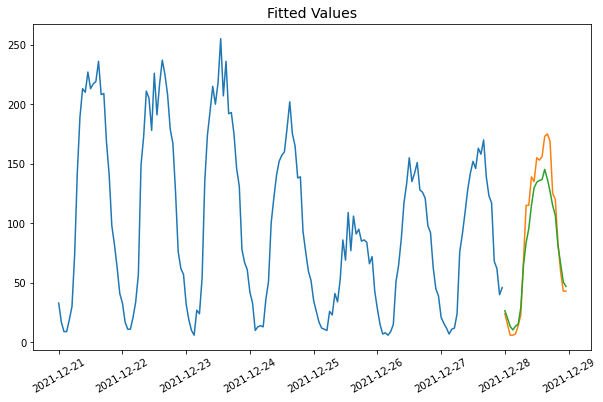

In [74]:
figure(figsize=(10, 6))
plt.title("Fitted Values",fontsize='14', horizontalalignment='center')
plt.plot(train1['count'])
plt.plot(test1['count'])
plt.plot(predictions1['forecasted_actual'])
plt.xticks(rotation=30)

(array([738152.   , 738152.125, 738152.25 , 738152.375, 738152.5  ,
        738152.625, 738152.75 , 738152.875, 738153.   ]),
 <a list of 9 Text major ticklabel objects>)

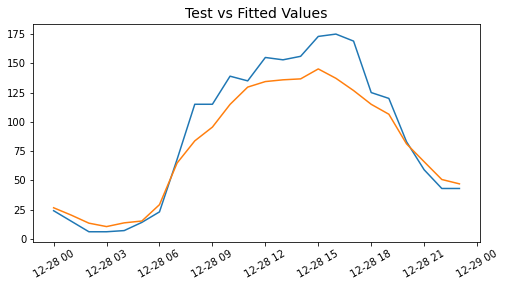

In [75]:
figure(figsize=(8, 4))
plt.title("Test vs Fitted Values",fontsize='14', horizontalalignment='center')
plt.plot(test1['count'])
plt.plot(predictions1['forecasted_actual'])
plt.xticks(rotation=30)

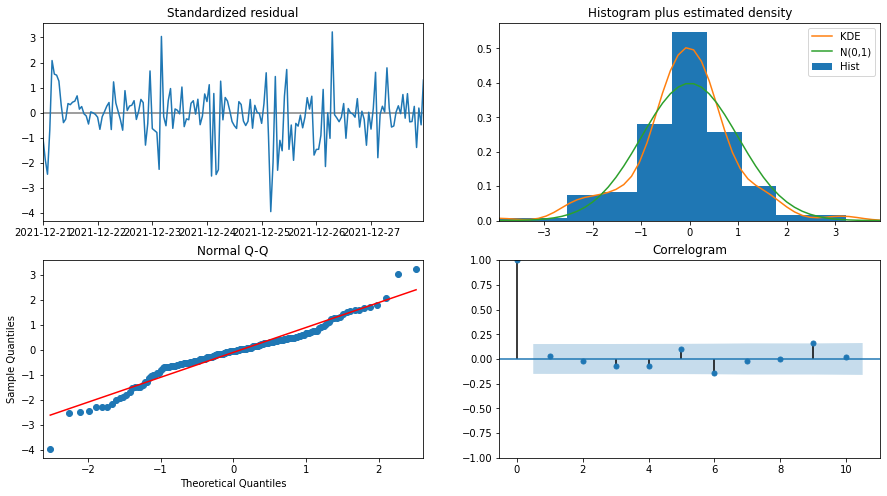

In [76]:
model1.plot_diagnostics(figsize=(15,8))
plt.show()